In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from collections import Counter

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD


C:\Users\lmh23\AppData\Local\Temp\ipykernel_17276\2252302552.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


CountVectorizer

In [5]:
data = pd.read_csv('archive/abcnews-date-text.csv')
data = data.sample(100000)

# Choose a vectorizer
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2, max_features=2000)
count_X = count_vectorizer.fit_transform(data['headline_text'])
count_X_array = count_X.toarray()

# Define the autoencoder architecture
count_input_dim = count_X.shape[1]  # This will be the number of features (max_features)
count_encoding_dim = 64

In [6]:
count_input_layer = Input(shape=(count_input_dim,))
count_encoded = Dense(count_encoding_dim, activation='relu')(count_input_layer)
count_decoded = Dense(count_input_dim, activation='sigmoid')(count_encoded)

In [7]:
count_autoencoder = Model(count_input_layer, count_decoded)
count_encoder = Model(count_input_layer, count_encoded)

In [8]:
count_autoencoder.compile(optimizer='adam', loss='mse')


# Train the autoencoder
count_autoencoder.fit(count_X_array, count_X_array,
                epochs=10,
                batch_size=16,
                shuffle=True,)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0176
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0017
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0015
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0013
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0012
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0011
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0011
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0011
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0011
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0011


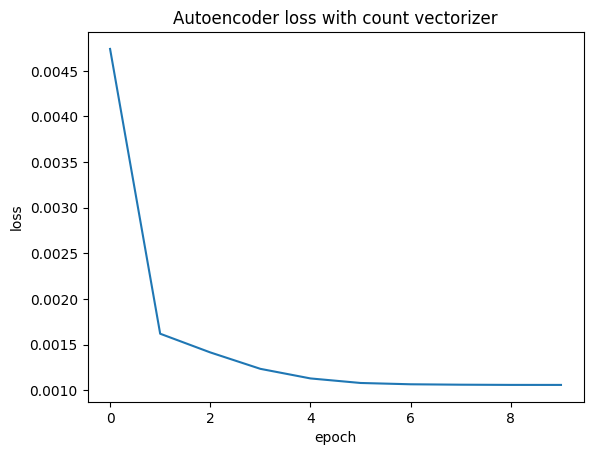

In [9]:
# plot the loss
plt.plot(count_autoencoder.history.history['loss'])
plt.title('Autoencoder loss with count vectorizer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [10]:
# Get the encoded representation of the data
count_encoded_data = count_encoder.predict(count_X_array)

count_encoded_data

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 499us/step


array([[0.44446158, 2.682161  , 0.79346967, ..., 0.22058678, 1.7592689 ,
        2.9401593 ],
       [1.3337656 , 1.2789356 , 1.3615696 , ..., 1.3825428 , 1.3393244 ,
        1.3580767 ],
       [1.0027311 , 1.79639   , 1.9337517 , ..., 1.2164419 , 0.5255364 ,
        3.5307624 ],
       ...,
       [1.988813  , 2.5834951 , 1.5195282 , ..., 1.125258  , 1.26489   ,
        1.1002198 ],
       [1.2200112 , 2.0216928 , 1.3993524 , ..., 2.018169  , 0.534514  ,
        2.1325831 ],
       [1.3595728 , 1.4147061 , 1.3512294 , ..., 1.4842024 , 1.2044727 ,
        1.4542227 ]], dtype=float32)

In [11]:
# decode the encoded data
count_reconstructed_data = count_autoencoder.predict(count_X_array)
count_reconstructed_data

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 848us/step


array([[2.1117557e-09, 6.2146233e-10, 1.0817768e-09, ..., 5.3612031e-10,
        4.1229362e-10, 2.9076783e-10],
       [2.0800115e-09, 3.5799999e-10, 4.8697046e-10, ..., 3.4792522e-10,
        2.8663086e-10, 1.9338081e-10],
       [1.3234193e-10, 2.5924131e-11, 4.3503784e-11, ..., 2.1530102e-11,
        2.3246001e-11, 2.5594948e-11],
       ...,
       [1.5260940e-09, 2.5867097e-10, 3.4401806e-10, ..., 2.2151102e-10,
        1.5157922e-10, 1.1653567e-10],
       [1.1455190e-09, 2.2648952e-10, 3.0116162e-10, ..., 1.7742748e-10,
        1.4034007e-10, 1.0559312e-10],
       [1.8013984e-09, 3.4228362e-10, 4.6087853e-10, ..., 3.3530428e-10,
        2.6750738e-10, 1.7593729e-10]], dtype=float32)

In [12]:
# decode the data
# decoded_data = autoencoder.predict(count_X_array)
# decoded_data

In [13]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [14]:
# put the data back into a lsa


n_topics = 10
count_lsa_model = TruncatedSVD(n_components=n_topics)
count_lsa_topic_matrix = count_lsa_model.fit_transform(count_reconstructed_data)

count_lsa_keys = get_keys(count_lsa_topic_matrix)
count_lsa_categories, lsa_counts = keys_to_counts(count_lsa_keys)


In [16]:
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    Returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order.
    '''
    top_words = []
    for topic in range(n_topics):
        mask = np.array(keys) == topic  # Create a boolean mask where the keys match the topic
        temp_vector_sum = np.sum(document_term_matrix[mask], axis=0)  # Sum the vectors for the topic
        
        # Handle different possible data types of temp_vector_sum
        if isinstance(temp_vector_sum, np.matrix):
            temp_vector_sum = temp_vector_sum.A1  # Convert matrix to 1D numpy array
        elif isinstance(temp_vector_sum, np.ndarray) and temp_vector_sum.ndim > 1:
            temp_vector_sum = temp_vector_sum.flatten()  # Flatten if it's a multidimensional numpy array
        elif hasattr(temp_vector_sum, 'toarray'):  # Check if it's a sparse matrix
            temp_vector_sum = temp_vector_sum.toarray().flatten()  # Convert sparse matrix to 1D numpy array

        top_n_word_indices = np.argsort(temp_vector_sum)[-n:][::-1]  # Get indices of top n words
        topic_words = [count_vectorizer.get_feature_names_out()[index] for index in top_n_word_indices]
        top_words.append(" ".join(topic_words))
    return top_words

In [32]:
top_n_words_lsa = get_top_n_words(5, count_lsa_keys, count_X, count_vectorizer)
for i in range(len(top_n_words_lsa)):
    print('Topic {}: '.format(i), top_n_words_lsa[i], end='')
    print(' | Topic Count: {}'.format(lsa_counts[i]))

Topic 0:  police crash car missing search | Topic Count: 59997
Topic 1:  new year deal record laws | Topic Count: 6256
Topic 2:  man charged dies killed murder | Topic Count: 2525
Topic 3:  says pm minister trump labor | Topic Count: 4631
Topic 4:  govt wa plan water qld | Topic Count: 4084
Topic 5:  australia day world cup china | Topic Count: 1388
Topic 6:  court accused death face case | Topic Count: 4236
Topic 7:  council mayor plan considers water | Topic Count: 3714
Topic 8:  nsw sydney coast government rural | Topic Count: 7290
Topic 9:  interview australian open home extended | Topic Count: 5879


In [19]:
# lda model

count_lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', random_state=42, verbose=0)
count_lda_topic_matrix = count_lda_model.fit_transform(count_reconstructed_data)

count_lda_keys = get_keys(count_lda_topic_matrix)
count_lda_categories, lda_counts = keys_to_counts(count_lda_keys)

KeyboardInterrupt: 

In [34]:


results = []
top_n_words_lda = get_top_n_words(5, count_lda_keys, count_X, count_vectorizer)
for i in range(len(top_n_words_lda)):
    result = f'Topic {i}: {top_n_words_lda[i]} | Topic Count: {lda_counts[i]}'
    results.append(result)
    print(f"finished {i} of {len(top_n_words_lda)} topics")

for result in results:
    print(result)

finished 0 of 10 topics
finished 1 of 10 topics
finished 2 of 10 topics
finished 3 of 10 topics
finished 4 of 10 topics
finished 5 of 10 topics
finished 6 of 10 topics
finished 7 of 10 topics
finished 8 of 10 topics
finished 9 of 10 topics
Topic 0: crash sydney south trial north | Topic Count: 15581
Topic 1: water calls government hospital power | Topic Count: 6724
Topic 2: police wa sa school car | Topic Count: 5263
Topic 3: court nsw world report cup | Topic Count: 6872
Topic 4: says man plan china coronavirus | Topic Count: 7445
Topic 5: new day wins election test | Topic Count: 8823
Topic 6: death australian qld dies canberra | Topic Count: 11076
Topic 7: interview council govt australia set | Topic Count: 24047
Topic 8: charged man coast woman killed | Topic Count: 8128
Topic 9: health home abc talks pm | Topic Count: 6041


In [20]:
# TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2, max_features=2000)
tfidf_X = tfidf_vectorizer.fit_transform(data['headline_text'])
tfidf_X_array = tfidf_X.toarray()

# Define the autoencoder architecture
tfidf_input_dim = tfidf_X.shape[1]  # This will be the number of features (max_features)
tfidf_encoding_dim = 64

tfidf_input_layer = Input(shape=(tfidf_input_dim,))
tfidf_encoded = Dense(tfidf_encoding_dim, activation='relu')(tfidf_input_layer)
tfidf_decoded = Dense(tfidf_input_dim, activation='sigmoid')(tfidf_encoded)

tfidf_autoencoder = Model(tfidf_input_layer, tfidf_decoded)
tfidf_encoder = Model(tfidf_input_layer, tfidf_encoded)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0173
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 4.8763e-04
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 4.8177e-04
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 4.7387e-04
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 4.6069e-04
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 4.4995e-04
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 4.3469e-04
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 4.2430e-04
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 4.1606e-04
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 4.0721e-04


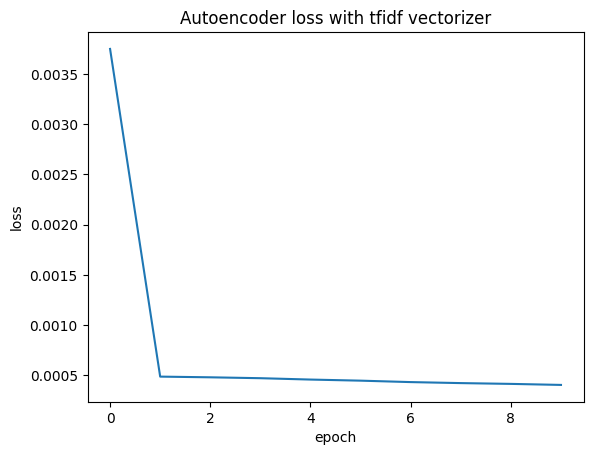

In [21]:
tfidf_autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
tfidf_autoencoder.fit(tfidf_X_array, tfidf_X_array,
                epochs=10,
                batch_size=16,
                shuffle=True,)

# plot the loss
plt.plot(tfidf_autoencoder.history.history['loss'])
plt.title('Autoencoder loss with tfidf vectorizer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()



In [22]:
# Get the encoded representation of the data
tfidf_encoded_data = tfidf_encoder.predict(tfidf_X_array)

# decode the encoded data
tfidf_reconstructed_data = tfidf_autoencoder.predict(tfidf_X_array)


n_topics = 10
tfidf_lsa_model = TruncatedSVD(n_components=n_topics)
tfidf_lsa_topic_matrix = tfidf_lsa_model.fit_transform(tfidf_reconstructed_data)

tfidf_lsa_keys = get_keys(tfidf_lsa_topic_matrix)
tfidf_lsa_categories, tfidf_lsa_counts = keys_to_counts(tfidf_lsa_keys)

top_n_words_tfidf_lsa = get_top_n_words(5, tfidf_lsa_keys, tfidf_X, tfidf_vectorizer)
for i in range(len(top_n_words_tfidf_lsa)):
    print('Topic {}: '.format(i), top_n_words_tfidf_lsa[i], end='')
    print(' | Topic Count: {}'.format(tfidf_lsa_counts[i]))


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 479us/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 686us/step
Topic 0:  govt nsw sydney wa water | Topic Count: 81872
Topic 1:  interview extended michael james david | Topic Count: 1847
Topic 2:  man charged police murder jailed | Topic Count: 1062
Topic 3:  police investigate probe hunt death | Topic Count: 1853
Topic 4:  new zealand laws york cases | Topic Count: 1933
Topic 5:  says pm trump opposition mp | Topic Count: 1261
Topic 6:  australia world cup win day | Topic Count: 3233
Topic 7:  court accused murder face case | Topic Count: 1993
Topic 8:  council plan water considers land | Topic Count: 2516
Topic 9:  crash dies killed car fatal | Topic Count: 2430


In [38]:
tfidf_lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', random_state=42, verbose=0)
tfidf_lda_topic_matrix = tfidf_lda_model.fit_transform(tfidf_reconstructed_data)

tfidf_lda_keys = get_keys(tfidf_lda_topic_matrix)
tfidf_lda_categories, tfidf_lda_counts = keys_to_counts(tfidf_lda_keys)

results = []
top_n_words_tfidf_lda = get_top_n_words(5, tfidf_lda_keys, tfidf_X, tfidf_vectorizer)
for i in range(len(top_n_words_tfidf_lda)):
    result = f'Topic {i}: {top_n_words_tfidf_lda[i]} | Topic Count: {tfidf_lda_counts[i]}'
    results.append(result)
    print(f"finished {i} of {len(top_n_words_tfidf_lda)} topics")

for result in results:
    print(result)

finished 0 of 10 topics
finished 1 of 10 topics
finished 2 of 10 topics
finished 3 of 10 topics
finished 4 of 10 topics
finished 5 of 10 topics
finished 6 of 10 topics
finished 7 of 10 topics
finished 8 of 10 topics
finished 9 of 10 topics
Topic 0: abc rural news open wins | Topic Count: 52177
Topic 1: water wa report court calls | Topic Count: 6099
Topic 2: police missing search china investigate | Topic Count: 6851
Topic 3: nsw australian health coast queensland | Topic Count: 3728
Topic 4: govt plan government sydney urged | Topic Count: 4843
Topic 5: new hospital dead year zealand | Topic Count: 2492
Topic 6: council set school plans rise | Topic Count: 5970
Topic 7: interview says death crash probe | Topic Count: 10277
Topic 8: man charged murder woman killed | Topic Count: 2386
Topic 9: australia world day win cup | Topic Count: 5177


In [23]:
# evaluate the model
# 1. coherence score
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

def get_topics(model, feature_names, n_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topics.append(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    return topics

def get_coherence_score(documents, topics):
    dictionary = Dictionary(documents)
    corpus = [dictionary.doc2bow(doc) for doc in documents]
    cm = CoherenceModel(topics=topics, texts=documents, dictionary=dictionary, coherence='c_v')
    return cm.get_coherence()

# get the topics
lsa_count_topics = get_topics(count_lsa_model, count_vectorizer.get_feature_names_out(), 5)
lsa_tfidf_topics = get_topics(tfidf_lsa_model, tfidf_vectorizer.get_feature_names_out(), 5)
lda_count_topics = get_topics(count_lda_model, count_vectorizer.get_feature_names_out(), 5)
lda_tfidf_topics = get_topics(tfidf_lda_model, tfidf_vectorizer.get_feature_names_out(), 5)

# get the coherence score
documents = data['headline_text'].apply(lambda x: x.split())
lsa_count_coherence = get_coherence_score(documents, lsa_count_topics)
lsa_tfidf_coherence = get_coherence_score(documents, lsa_tfidf_topics)
lda_count_coherence = get_coherence_score(documents, lda_count_topics)
lda_tfidf_coherence = get_coherence_score(documents, lda_tfidf_topics)

print(f'LSA Count Coherence: {lsa_count_coherence}')
print(f'LSA Tfidf Coherence: {lsa_tfidf_coherence}')
print(f'LDA Count Coherence: {lda_count_coherence}')
print(f'LDA Tfidf Coherence: {lda_tfidf_coherence}')

LSA Count Coherence: 0.3678497019245988
LSA Tfidf Coherence: 0.3715618579367542


In [24]:
# coverage
def get_topic_coverage(topic_matrix, document_term_matrix, threshold):
    '''
    returns the proportion of documents that are 
    assigned a topic with a proportion greater than 
    the threshold
    '''
    topic_proportions = np.max(topic_matrix, axis=1)
    return np.sum(topic_proportions > threshold) / len(topic_proportions)

lsa_count_coverage = get_topic_coverage(count_lsa_topic_matrix, count_X, 0.1)
lsa_tfidf_coverage = get_topic_coverage(tfidf_lsa_topic_matrix, tfidf_X, 0.1)
lda_count_coverage = get_topic_coverage(count_lda_topic_matrix, count_X, 0.1)
lda_tfidf_coverage = get_topic_coverage(tfidf_lda_topic_matrix, tfidf_X, 0.1)

print(f'LSA Count Coverage: {lsa_count_coverage}')
print(f'LSA Tfidf Coverage: {lsa_tfidf_coverage}')
print(f'LDA Count Coverage: {lda_count_coverage}')
print(f'LDA Tfidf Coverage: {lda_tfidf_coverage}')

LSA Count Coverage: 0.28088
LSA Tfidf Coverage: 0.30257
